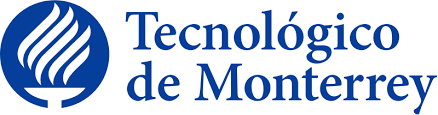

#**Maestría en Inteligencia Artificial Aplicada**
##**Curso: Procesamiento de Lenguaje Natural (NLP)**
###Tecnológico de Monterrey
###Prof Luis Eduardo Falcón Morales

## **Actividad en Equipos - Semana 6 y 7: Modelado de Temas : LSI / LDA**

###**Equipo 5:**

###**A01748750 - Evelyn Aylin Rendón Medina**
###**A01002111 - Luis Salvador Cruz Najera**
###**A01169213 - Laura Elena Hernández Mata**
###**A01793052 - Juan Carlos Lopez Cruz**
###**A01793054 - Rafael José Mateo Comprés**


#**Actividad en Equipos - Semana 5:** 

En la actividad de esta semana trabajarás en equipos en el tema de modelado de temas (topic modeling).

**Topic modeling** es un conjunto de técnicas para descubrir estructuras latentes semánticas comunes (topics/temas) en un conjunto de documentos. Al final, lo que nos permite el topic modeling es, dado un documento, hallar los temas de los que se está hablando.

**Aspectos generales del topic modeling**
El topic modeling surge a raíz de la pregunta: ¿cómo podemos sintetizar la información en una colección grande de documentos con información semiestructurada? La respuesta está alojada en la manera en la que funciona el topic modeling.

**¿Qué algoritmo usamos?**

**Indexación semántica latente o LSI**

* La indexación semántica latente (LSI) proviene del análisis semántico latente (LSA), una técnica de procesamiento del lenguaje natural que incluye la programación de computadoras para procesar y analizar masas de lenguaje natural.

* LSI o indexación semántica latente es, por tanto, la aplicación de todos estos enfoques a la extracción de información, mientras que sus problemas básicos son la sinonimia (palabras con significados similares) y la polisemia (una variedad de significados dentro de una palabra o concepto).

* El método LSI utiliza un método de indexación y recuperación que utiliza una técnica de descomposición de valor singular (SVD) para identificar patrones en las relaciones entre los términos y conceptos contenidos en una colección de texto no estructurada. 

**Análisis discriminante lineal**

* El Análisis Discriminante Lineal o Linear Discrimiant Analysis (LDA) es un método de clasificación supervisado de variables cualitativas en el que dos o más grupos son conocidos a priori y nuevas observaciones se clasifican en uno de ellos en función de sus características. Haciendo uso del teorema de Bayes, LDA estima la probabilidad de que una observación, dado un determinado valor de los predictores, pertenezca a cada una de las clases de la variable cualitativa, $$P(Y=k|X=x)$$
* Finalmente se asigna la observación a la clase k para la que la probabilidad predicha es mayor.

# **Actividades:**

###1.- Descarga el archivo noticiasTopicModeling.txt que se encuentra en Canvas. Este archivo consiste en 5658 noticias de varios periódicos de España. El archivo de texto es una lista en el siguiente formato: [{“titular”:”Encabezado“, “texto”:”Cuerpo”}, … , {“titular”:”Encabezado”,”texto”:”Cuerpo”}]

### Donde “titular” es el encabezado de la noticia y “texto” es el cuerpo del texto de dicha noticia. En particular en esta actividad trabajarás solamente con los cuerpos de las noticias, sin incluir los encabezados. Carga dicho archivo y genera un DataFrame de Pandas llamado “df” y que contiene una única columna llamada “noticia” con 5658 renglones formados por los cuerpos de las noticias.

#### <font color='blue'> Librerías a Utilizar

In [4]:
import pandas as pd  
import spacy

import seaborn as sns
import matplotlib.pyplot as plt

import requests
import zipfile
from io import BytesIO

import re
import unicodedata

import gensim.corpora as corpora
from gensim.models import LsiModel
from gensim.models.coherencemodel import CoherenceModel

#### <font color='blue'> Descarga, extracción y lectura del corpus a trabajar:

In [5]:
# Descargamos dataset
req = requests.get('https://github.com/luiscruzn/data/raw/main/noticiasTopicModeling.zip')

# Extraemos el contenido y lo almacenamos en el path local de Colab
zipfile= zipfile.ZipFile(BytesIO(req.content))
zipfile.extractall('./')

In [7]:
df = pd.read_json("./noticiasTopicModeling.txt", orient='records')["texto"].to_frame("noticia")
df.head()

,noticia
0,"""España ha dejado de ser católica"", decía Manu..."
1,El clima de crispación social en Ceuta ha lleg...
2,El Gobierno ha alegado la suspensión de plazos...
3,"Puedes mandar tu pregunta, sugerencia o queja ..."
4,Panamá debe entregar esta semana a la Corte In...


#### <font color='blue'> Comprobación de que el corpus contenga 5658 documentos (noticias).

In [8]:
assert df.shape[0] == 5658

###2.- Realiza un proceso de limpieza. Aplica el preprocesamiento que consideres adecuado para texto en español. Recuerda que el objetivo es identificar los tokens que describan mejor la distribución de cada tema.### 

#### <font color='blue'> Función para la limpieza de datos:

In [9]:
def clean_doc(doc):

    doc = unicodedata.normalize('NFKD', doc).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    # Con REGEX reemplazamos por espacio todo aquello que no es letra o espacio dejando solo caracteres alfabéticos
    doc = re.sub(r'[^A-Za-z\s]', ' ', doc)
    # Con REGEX reemplazamos todos aquellos espacios dobles o mayores por espacios simples
    doc = re.sub(r'\s{2,}', ' ', doc)
    # Simplificamos todo a minúsculas
    doc = doc.lower()
    
    return doc

#### <font color='blue'> Función para lematizar, eliminar stop Word y filtrar palabras mayores a 1 letra:

In [10]:
nlp = spacy.load("es_core_news_sm", disable=['textcat', 'attribute_ruler'])
print(nlp.pipe_names)

def tokenize(corpus):
    
    docs = nlp.pipe(corpus)#, n_process=4, batch_size=1000)
    tokens = []
    
    for doc in docs:
        tokens.append([word.lemma_ for word in doc if word.is_stop == False and len(word.text) > 1])
    
    return tokens

['tok2vec', 'morphologizer', 'parser', 'lemmatizer', 'ner']


#### <font color='blue'> Aplicación de ambas funciones al corpus:

In [11]:
cleaned_docs = [clean_doc(row.noticia) for row in df.itertuples()]

#### <font color='blue'> Tokenizacion:

In [12]:
tokens = tokenize(cleaned_docs)

In [13]:
for x in tokens[0:5]:
  print(x)

['espana', 'dejar', 'catolico', 'decia', 'manuel', 'azán', 'comienzo', 'republica', 'congreso', 'diputado', 'aprobo', 'ley', 'laicista', 'metafora', 'dejo', 'catolica', 'papel', 'ley', 'creencia', 'pueblo', 'migracion', 'integracion', 'europeo', 'programa', 'vox', 'europa', 'espán', 'domingo', 'noviembre', 'dejar', 'excepcion', 'europa', 'potencia', 'extremo', 'derecha', 'parlamento', 'metafora', 'precisamente', 'excepcional', 'dictadura', 'mediados', 'setenta', 'dictador', 'estar', 'mausoleo', 'ano', 'muerto', 'existiar', 'cosa', 'portugal', 'grecia', 'italia', 'alemania', 'país', 'dictadura', 'fascista', 'espana', 'pasar', 'portugal', 'italia', 'alemania', 'derroto', 'fascismo', 'franquismo', 'murio', 'cama', 'harakiri', 'corte', 'franquista', 'ruptura', 'regimen', 'reforma', 'nacio', 'muto', 'ley', 'ley', 'espana', 'parecia', 'vacunado', 'a yo', 'franquismo', 'haber', 'bastantes', 'llegar', 'irrupcion', 'posfranquismo', 'actor', 'fundamental', 'gobierno', 'autonomico', 'local', 'pp'

In [14]:
print(len(tokens))

5658


#### <font color='blue'>  Eliminación de documentos vacíos:

In [15]:
# Eliminamos vacíos
tokens = list(filter(None, tokens))
print(len(tokens))

5657


#### <font color='blue'>  Creación del vocabulario:

In [16]:
from collections import Counter

vocab = Counter() #Vocabulario

for k in range(len(tokens)):
 vocab.update(tokens[k])

print('Longitud del diccionario de entrenamiento:', len(vocab))  
print('\n(word,frequency):') 
print(vocab.most_common(10)) 

Longitud del diccionario de entrenamiento: 79788

(word,frequency):
[('gobierno', 10982), ('ano', 10962), ('caso', 10315), ('persona', 8662), ('coronavirus', 6709), ('politico', 6176), ('madrid', 6173), ('etiqueta', 5681), ('espana', 5657), ('pp', 5108)]


#### <font color='blue'>  Eliminar tokens con frecuencia menor a 2 y reducir el tamaño del vocabulario

In [17]:
min_freq = 2

midicc = {k: v for k, v in vocab.items() if v >= min_freq}

print('Nueva longitud del nuevo vocabulario:', len(midicc))
print(list(midicc.items())[0:5])     # veamos algunos elementos del diccionario.

Nueva longitud del nuevo vocabulario: 46754
[('espana', 5657), ('dejar', 3311), ('catolico', 132), ('decia', 146), ('manuel', 889)]


In [18]:
mivocab = list(midicc.keys()) 

#### <font color='blue'>  Unir los tokens de cada documento.

In [19]:
sentences = [" ".join(x) for x in tokens]
print(len(sentences))

5657


#### <font color='blue'> Visualización de la frecuencia de tokens en el vocabulario con una nube de palabras:

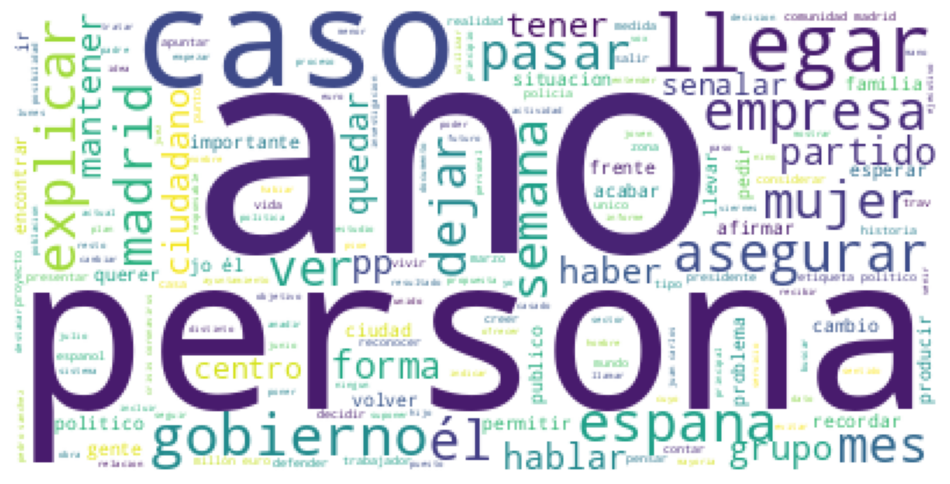

In [20]:
from wordcloud import WordCloud
from matplotlib import pyplot as plt 

wc_text = ''

for token in tokens:

  wc_text = wc_text +" " + " ".join(token)

wc = WordCloud(background_color='white').generate(wc_text)

#plot the wordcloud
plt.figure(figsize = (12, 12))
plt.imshow(wc)

#to remove the axis value
plt.axis("off")
plt.show()

###3.- ¿Por qué en este caso no requerimos hacer una partición en entrenamiento, validación y prueba?###

#### <font color='blue'> **Respuesta:**

En este caso, no se requiere hacer una partición en conjuntos de entrenamiento, validación y prueba porque el formato de los datos nos indica que se trata de un conjunto de ejemplos no etiquetados o anotados. Es decir, vamos a trabajar con un entrenamiento no supervisado, que es precisamente de lo que trata el modelao de tópicos, ya sea LSI o LDA, los cuales nos brindan métodos para organizar, buscar, entender y resumir grandes vólumenes de datos, donde cada documento es una colección de temas (tópicos) en cierta proporción y a su vez, cada tema es una colección de palabras clave.

El formato del archivo de texto es una lista de diccionarios, donde cada diccionario representa un ejemplo con dos campos: "titular" y "texto", del cual renombramos la columna por "noticia". Estos campos contienen el encabezado y el cuerpo de una noticia, respectivamente. Dado que el archivo ya contiene los ejemplos sin etiqueta en esta estructura, no tiene sentido dividirlos o hacer alguna partición.

La partición en conjuntos de entrenamiento, validación y prueba generalmente se realiza cuando se tiene un conjunto de datos etiquetados y se necesita dividirlo en un conjunto de entrenamiento para entrenar un modelo, un conjunto de validación para ajustar los hiperparámetros del modelo y un conjunto de prueba para evaluar el rendimiento final del modelo. Sin embargo, en este caso, como los ejemplos no están etiquetados, el entrenamiento no podría ser supervisado y por ende, como se menciona, no es necesaria la partición, pues no habría diferencia al entrenar o alimentar el modelo, sino simplemente estaríamos introduciendo menos datos.

##**Parte 1: Indexación semántica latente (LSI)**#

###4.- Encontrar la matriz Tf-idf de la columna de noticias. Despliega los primeros 5 renglones con algunas de sus columnas con sus nombres, donde las columnas son los tokens. ¿Cuál es el significado de cada renglón? ¿Y el significado de cada columna?###


#### <font color='blue'> **Respuesta:**

En las columnas podemos observar los tokens (unidad mínima de información definida, que particularmente son las palabras en esta actividad) y en los renglones o filas, se definen los documentos, que en nuestro caso particular se componen por las noticias cargadas. Los valores que se ubican entre filas y columnas son la frecuencia de cada token en el respectivo documento de su fila.

#### <font color='blue'> Creación de matriz Tf-idf:

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(smooth_idf=True, vocabulary=mivocab)
vector =tfidf.fit_transform(sentences)
X = vector.toarray()

df_tfidfvect = pd.DataFrame(
    data=X, 
    columns=tfidf.get_feature_names_out()
)

print(df_tfidfvect.iloc[0:5])


     espana     dejar  catolico     decia    manuel      azán  comienzo  \
0  0.101366  0.081811  0.053093  0.048509  0.067832  0.076369   0.04339   
1  0.010432  0.021048  0.027319  0.000000  0.000000  0.000000   0.00000   
2  0.014270  0.000000  0.000000  0.000000  0.000000  0.000000   0.00000   
3  0.000000  0.000000  0.000000  0.000000  0.017074  0.000000   0.00000   
4  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   0.00000   

   republica  congreso  diputado  ...  amal  gladstonir  waldo  scully  yaga  \
0   0.045025  0.031102  0.033384  ...   0.0         0.0    0.0     0.0   0.0   
1   0.000000  0.000000  0.103067  ...   0.0         0.0    0.0     0.0   0.0   
2   0.000000  0.000000  0.000000  ...   0.0         0.0    0.0     0.0   0.0   
3   0.000000  0.000000  0.000000  ...   0.0         0.0    0.0     0.0   0.0   
4   0.000000  0.000000  0.000000  ...   0.0         0.0    0.0     0.0   0.0   

   dubravka  ugresic  impedimenta  cicala  mainlander  
0       0.0 

### 5.- Aplica el método de descomposición de valores singulares truncado a la matriz Tf-idf anterior con 10 componentes y obtener el gráfico de la importancia relativa de estas.###

#### <font color='blue'> Creación y entrenamiento del modelo SVD truncado:

In [22]:
from sklearn.decomposition import TruncatedSVD
svd_model = TruncatedSVD(n_components=10, algorithm='randomized', n_iter=100, random_state=122)
svd_model.fit(X)
print("Número de componentes:",len(svd_model.components_))

Número de componentes: 10


In [23]:
sigmas = svd_model.singular_values_

#### <font color='blue'> Visualización de la importancia relativa de cada componente latente:

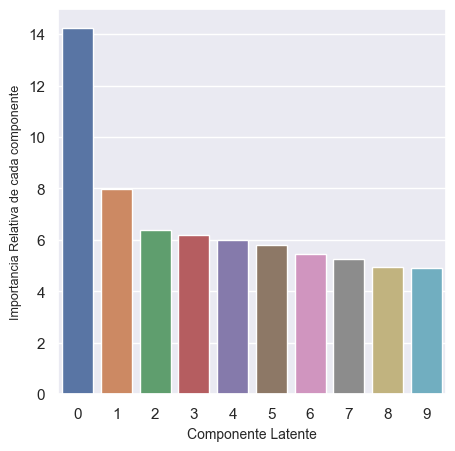

In [24]:
sns.set(rc = {'figure.figsize': (5,5)})
chart = sns.barplot(x = list(range(len(sigmas))), y = sigmas)
chart.set_xlabel('Componente Latente', fontdict = {'size': 10})
chart.set_ylabel('Importancia Relativa de cada componente', fontdict = {'size': 9})
plt.show()

###6.- Obtener la matriz tokens-temas (term-topic) a partir de la matriz $V^{t}$ de la descomposición SVD. Despliega sus primeros 5 renglones donde se incluya el nombre de las columnas###

In [25]:
lsi_term_topic = svd_model.components_.T
print(lsi_term_topic.shape)

(46754, 10)


In [26]:
terms_names = list(tfidf.get_feature_names_out())
print(terms_names[0:10])

['espana', 'dejar', 'catolico', 'decia', 'manuel', 'azán', 'comienzo', 'republica', 'congreso', 'diputado']


In [27]:
term_topic_matrix = pd.DataFrame(
    data = lsi_term_topic, 
    index = terms_names, 
    columns = [f'Concepto_Latente_{i}' for i in range (0, lsi_term_topic.shape[1])])
term_topic_matrix.head()

,Concepto_Latente_0,Concepto_Latente_1,Concepto_Latente_2,Concepto_Latente_3,Concepto_Latente_4,Concepto_Latente_5,Concepto_Latente_6,Concepto_Latente_7,Concepto_Latente_8,Concepto_Latente_9
espana,0.085422,0.012433,-0.018951,-0.047793,-0.010995,0.037627,0.034414,-0.068093,0.065431,-0.044040
dejar,0.047232,-0.018060,-0.014611,-0.011921,-0.012522,0.015742,-0.011577,-0.011167,0.023706,0.017890
catolico,0.003271,-0.002828,-0.005211,-0.000287,0.000190,0.004266,-0.004528,-0.001071,0.000891,0.001117
decia,0.004133,-0.002491,-0.003176,-0.000874,-0.001083,0.002532,-0.005220,-0.003003,0.002618,0.004386
manuel,0.019158,-0.029954,0.001088,-0.010323,0.045816,-0.021850,0.004515,-0.010349,-0.022380,0.002825


###7.- Con base a la cantidad de conceptos latentes que determinaste en el ejercicio 6 anterior, obtener cada uno de sus gráficos con sus 10 términos/tokens más importantes. ¿Cómo describirías cada uno de dichos conceptos latentes?###

#### <font color='blue'> **Respuesta:**

Como sabemos, la información latente, es aquella que está presente en los documentos, pero "oculta" de cierta forma, es decir, no está del todo visible. Por tanto, al determinar los conceptos latentes en el paso anterior, podemos percibir que, de manera implícita, dentro de las noticias, se tocan temas relacionados con el coronavirus, gobierno, caso, madrid, persona, pp, comunidad, ano, medida y partido. Escrito de otra forma, si bien las noticias pueden no estar hablando directamente de dichos temas, al analizarlas se descubre por medio de las palabras que son a su vez conceptos que se tocan dentro de las mismas.

#### <font color='blue'> Gráficas de los 10 términos por token

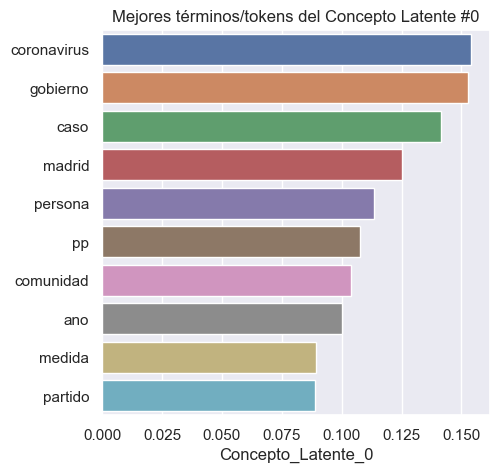

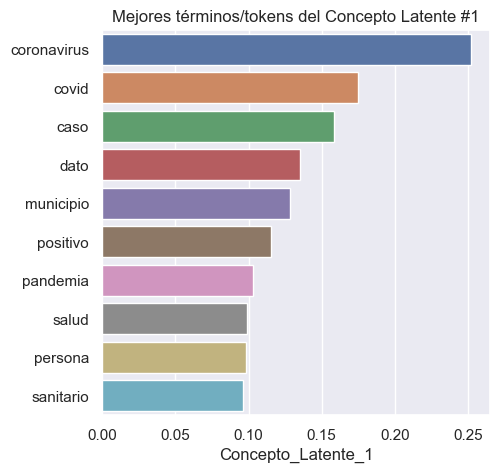

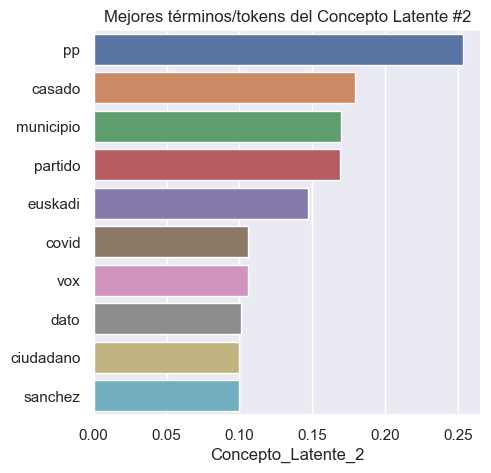

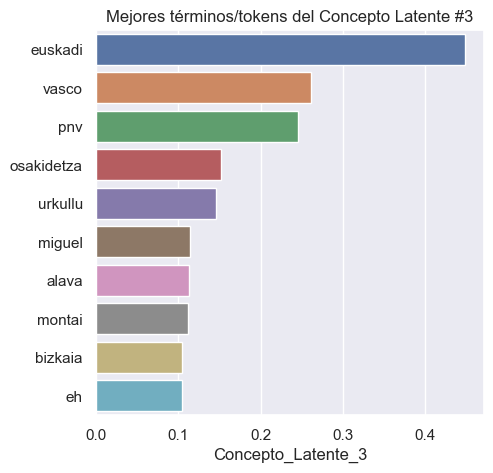

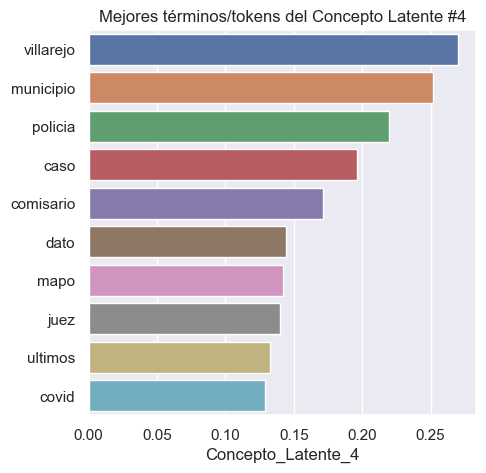

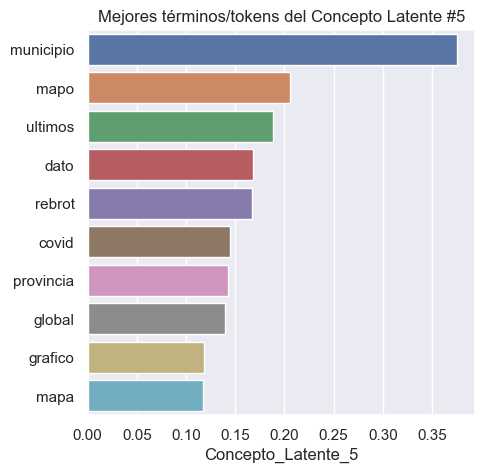

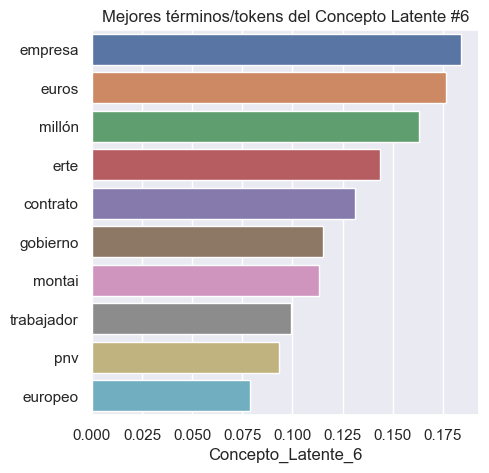

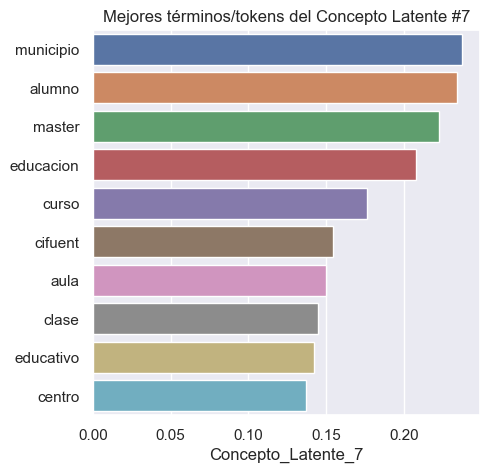

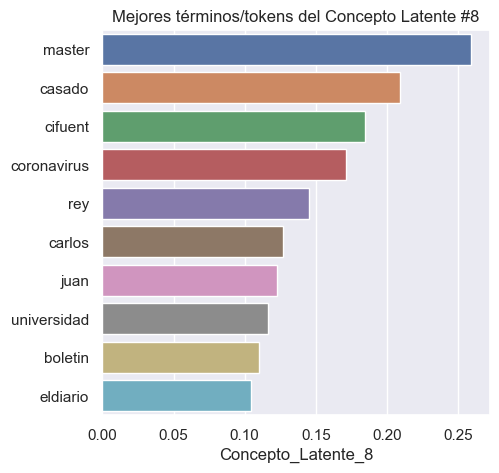

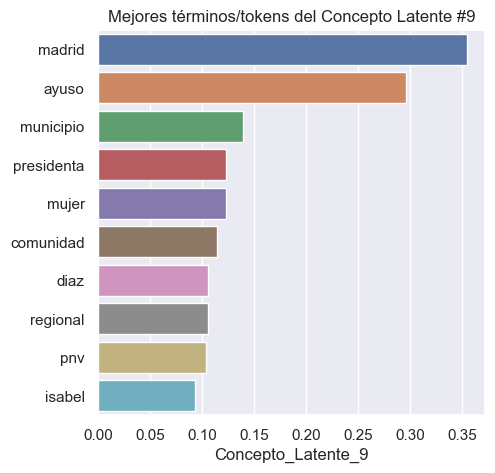

In [28]:
top = 10
for i,col in enumerate(term_topic_matrix.columns):
    data = term_topic_matrix[col].sort_values(ascending = False)
    top_terms = data[:top]
    
    sns.set(rc = {'figure.figsize': (5,5)})
    plt.title (f'Mejores términos/tokens del Concepto Latente #{i}')
    chart = sns.barplot(x = top_terms, y = top_terms.index)
    plt.show()

###8.- Para cada uno de los 10 conceptos latentes obtenidos con la descomposición SVD del ejercicio 5, obtener el gráfico de barras que muestre los 10 términos/tokens más importantes de cada uno de ellos.###

#### <font color='blue'> **Es la misma respuesta que la pregunta 7**


###9.- Con base a los resultados del ejercicio anterior, ¿cuántos tópicos o conceptos latentes identificas con claridad? ¿Cómo los describirías, es decir, de qué temáticas estarían hablando?###

#### <font color='blue'> **Respuesta:**

Los conceptos latentes que se identifican son:
- Tópico 1: Coronavirus en Madrid
- Tópico 2: Casos de coronavirus (Mismos temas que en el Tópico 1)
- Tópico 3: Elecciones / Noticias políticas
- Tópico 4: Coronavirus en País Vasco
- Tópico 5: Caso Villarejo
- Tópico 6: Rebrote Coronavirus
- Tópico 7: Caso Montai
- Tópico 8: Educación
- Tópico 9: No se observa un patron claro es una mezcla de los topicos coronavirus y el rey de españa
- Tópico 10: Gobierno de Díaz Ayuso

###10.- La librería de código abierto Gensim, incluye la implementación de la técnica LSI. Ver documentación: https://radimrehurek.com/gensim/models/lsimodel.html 
###Investiga la documentación de este modelo LSI en Gensim y aplica dicha técnica a tu conjunto de datos. En particular, obtener los modelos de 2 a 10 temas/tópicos y para cada uno de ellos obtener su valor (score) de coherencia. Con base a dichos valores, ¿qué cantidad de tópicos sería el adecuado? ¿Coincide con lo que obtuviste previamente, usando la técnica SVD de manera directa?###

#### <font color='blue'> **Respuesta:**

No, los resultados no coinciden del todo. Al emplear la técnica SVD de manera directa, en contraste con LSI o LDA, tenemos una agrupación distinta, la cual consideramos que muestra un mejor rendimiento.

In [30]:
doc_dict = corpora.Dictionary(tokens)
bow = [doc_dict.doc2bow(doc) for doc in tokens]

In [31]:
metrics = []
for i in range(2,11):
  
  lsi = LsiModel(bow, num_topics=i,id2word = doc_dict, chunksize = len(tokens), random_seed = 42)
  cm = CoherenceModel(model = lsi, texts = tokens, dictionary = doc_dict, window_size = 3, coherence = 'c_v', topn = 3)
  metrics.append([i,cm.get_coherence()])


In [32]:
df_metrics = pd.DataFrame(data= metrics, columns = ['Topics', 'Metrics'])
df_metrics

,Topics,Metrics
0,2,0.521486
1,3,0.551842
2,4,0.569510
3,5,0.530607
4,6,0.542889
5,7,0.592950
6,8,0.506359
7,9,0.590236
8,10,0.536624


In [33]:
best_num_topics = df_metrics[df_metrics['Metrics'] == df_metrics['Metrics'].max()]['Topics'].values[0]
print(f'Mejor número de tópicos: {best_num_topics}')

Mejor número de tópicos: 7


In [34]:
lsi = LsiModel(bow, 
               num_topics=best_num_topics, 
               id2word=doc_dict,
               chunksize=len(tokens),
               random_seed=7
               )

# Veamos la manera en que se distribuyen los términos en cada tópico generado:
for topic_num, words in lsi.print_topics(num_words=4):
    print('Tokens/Words in Topic {}: {}.'.format(topic_num, words))

Tokens/Words in Topic 0: 0.241*"gobierno" + 0.240*"caso" + 0.211*"persona" + 0.201*"ano".
Tokens/Words in Topic 1: 0.268*"pp" + -0.255*"caso" + -0.251*"coronavirus" + 0.238*"partido".
Tokens/Words in Topic 2: -0.324*"caso" + 0.244*"ano" + -0.236*"pp" + -0.204*"madrid".
Tokens/Words in Topic 3: -0.490*"caso" + 0.283*"gobierno" + -0.166*"policia" + -0.158*"numero".
Tokens/Words in Topic 4: 0.307*"madrid" + -0.229*"persona" + -0.221*"pp" + -0.213*"non".
Tokens/Words in Topic 5: -0.232*"policia" + 0.224*"non" + -0.215*"villarejo" + -0.160*"empresa".
Tokens/Words in Topic 6: -0.422*"madrid" + -0.259*"non" + 0.217*"vasco" + -0.178*"goberno".


##**Parte 2: Asignación de Dirichlet Latente (LDA)**#

###11.- Utiliza la librería Gensim para implementar ahora la técnica de LDA. Revisa la documentación correspondiente y aplica de preferencia el modelo paralelizable: 
###https://radimrehurek.com/gensim/models/ldamodel.html###
###https://radimrehurek.com/gensim/models/ldamulticore.html###


In [35]:
from gensim.models.ldamulticore import LdaMulticore
from multiprocessing import cpu_count

n_cores = cpu_count()

metrics = []
for i in range(2,11):
  
  lda = LdaMulticore(
    corpus=bow, 
    id2word = doc_dict, 
    num_topics = i, 
    chunksize = len(tokens), 
    passes = 10, 
    alpha = 0.2, 
    eta = 0.2, 
    workers = n_cores - 1, 
    random_state=42)
  cm = CoherenceModel(model = lda, texts = tokens, dictionary = doc_dict, window_size = 3, coherence = 'c_v', topn = 3)
  metrics.append([i,cm.get_coherence()])
  

In [36]:
df_metrics = pd.DataFrame(data= metrics, columns = ['Topics', 'Metrics'])
df_metrics

,Topics,Metrics
0,2,0.495954
1,3,0.547666
2,4,0.524868
3,5,0.556593
4,6,0.577348
5,7,0.606632
6,8,0.563164
7,9,0.554562
8,10,0.598804


In [37]:
best_num_topics = df_metrics[df_metrics['Metrics'] == df_metrics['Metrics'].max()]['Topics'].values[0]
print(f'Mejor número de tópicos: {best_num_topics}')

Mejor número de tópicos: 7


In [38]:
lda = LdaMulticore(
    corpus=bow, 
    id2word = doc_dict, 
    num_topics = best_num_topics, 
    chunksize = len(tokens), 
    passes = 10, 
    alpha = 0.2, 
    eta = 0.2, 
    workers = n_cores - 1, random_state=42)

# Veamos la manera en que se distribuyen los términos en cada tópico generado:
for topic_num, words in lda.print_topics(num_words=4):
    print('Tokens/Words in Topic {}: {}.'.format(topic_num, words))

Tokens/Words in Topic 0: 0.006*"ano" + 0.006*"gobierno" + 0.006*"millón" + 0.004*"europeo".
Tokens/Words in Topic 1: 0.006*"ano" + 0.005*"caso" + 0.004*"miguel" + 0.004*"guerra".
Tokens/Words in Topic 2: 0.008*"gobierno" + 0.008*"partido" + 0.007*"pp" + 0.006*"politico".
Tokens/Words in Topic 3: 0.006*"policia" + 0.006*"caso" + 0.005*"politico" + 0.005*"ano".
Tokens/Words in Topic 4: 0.007*"ano" + 0.005*"mujer" + 0.004*"persona" + 0.004*"vida".
Tokens/Words in Topic 5: 0.010*"coronavirus" + 0.009*"caso" + 0.008*"persona" + 0.006*"comunidad".
Tokens/Words in Topic 6: 0.010*"gobierno" + 0.008*"pp" + 0.007*"partido" + 0.006*"ley".


###12.- Con base a esta técnica ¿qué cantidad de tópicos consideras que es la más adecuada? Compara tus resultados con el método LSI. ¿Qué encuentras de coincidencias y diferencias? ¿Cuál consideras puede ser el mejor resultado, es decir, cuál consideras puede ser la mejor cantidad de tópicos a considerar?###

#### <font color='blue'> **Respuesta:** 

Con base en la comparación entre los métodos de LDA, LSI, y spacy, se encontró que el número indicado de tópicos es igual a 7, que es la coincidencia encontrada.

###13.- La librería pyLDAvis nos ayuda a visualizar de manera interactiva los temas y tokens de los documentos analizados. Revisa la documentación y utilízala para visualizar tus mejor resultado.###
###https://pypi.org/project/pyLDAvis/###

In [41]:
import pyLDAvis.gensim as gensimvis
import pyLDAvis
from IPython.display import display, HTML 

#pyLDAvis.enable_notebook()
vis_data = gensimvis.prepare(lda, bow, doc_dict)
pyLDAvis.save_html(vis_data, './lda_result.html')
display(HTML('./lda_result.html'))

###14. Incluye tus conclusiones finales de la actividad###

#### <font color='blue'> **Conclusiones:**

Durante el desarollo de la actividad, debemos resaltar de inicio la importancia de un correcto preprocesamiento de los datos, pues como suele decirse, "entra basura, sale basura". Por tanto, debemos asegurarnos de limpiar de manera adecuada las expresiones regulares, por ejemplo, a través de la librería re, como se realizó, para mantener únicamente caracteres alfabéticos, sustituir espacios en blanco dobles por simples, entre otras. De igual forma, entre los pasos de preprocesamiento de los datos, realizamos lemantización y eliminación de palabras que no aportan información, es decir, de las stopword y aquellas cuya longitud fuera de un caracter. Asimismo, consideramos improtante una frecuencia mínima por palabra igual a dos. Así pues, sabiendo que se tienen datos adecuados para alimentar un modelo, fuimos capaces de proseguir con al actividad.

Cabe destacar que no fue necesario realizar una partición del universo de datos en entrenamiento, prueba y validación debido a que, tal como nos indica la teoría del modelado de tópicos, se trata de un aprendizaje no supervisado y, por tanto, el entrenamiento no requeriría realizar esa validación y comprobación, pues no se poseen las etiquetas que nos permitirían hacerlo.
Posteriomente se trabajó con el respectivo modelado del lenguaje, es decir, transformar el texto en una presentación matemática, en nuestro caso, a través de una matriz TF-IDF, en la cual se considera la frecuencia de los tokens en los documentos, cuya particularidad se define porque la frecuencia en cierto punto, comienza a castigarse, es decir, se menciona tantas veces, que ya no aporta información. De igual forma, puede una palabra mencionarse tan pocas veces, que no aporta información.
Por otro lado, se utilizó la descomposición en valores singulares (SVD) que si bien puede ser empleada como técnica para reducir la dimensionalidad, en esta aplicación sirvió para encontrar las palabras clave de cada tema.

Finalmente, se emplearon diversas técnicas para identificar los temas clave o de mayor relevancia, donde se encontró que sí puede haber variaciones, dependiendo del método usado, la agrupación puede realizarse de manera distinta. Esto nos permite, por tanto 

## **Referencias:**

* KeepCoding. (s.f.). ¿Qué es el topic modeling?. https://keepcoding.io/blog/que-es-el-topic-modeling/#:~:text=El%20topic%20modeling%20es%20un,los%20que%20se%20est%C3%A1%20hablando.

* Amat,J.(2016). Análisis discriminante lineal (LDA) y análisis discriminante cuadrático (QDA). cienciadedatos.net. https://www.cienciadedatos.net/documentos/28_linear_discriminant_analysis_lda_y_quadratic_discriminant_analysis_qda

* BIMsoluciones. (2021, July 21). Que es Indexación semántica latente o LSI. https://bimsoluciones.com/indexacion-semantica/

* Vajjala, S., Majumder, B., Gupta, A., y Surana, H. (2020). Practical Natural Language Processing: A Comprehensive Guide to Building Real-World NLP Systems. O'Reilly

* Falcón Morales, L. E. (2023). Modelado de Temas: LSI [PDF]. Maestría en Inteligencia Artificial Aplicada. ITESM. 

* Falcón Morales, L. E. (2023). Modelado_de_Temas_LDA [PDF]. Maestría en Inteligencia Artificial Aplicada. ITESM. 